A Survey on Technology Choice
======


In [1]:
# For nicer printing
options(digits=2);
library(dplyr)
library(tidyr)
library(caret)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2


In [2]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [3]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

### Interpret  basic summaries

In [4]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


Interpret correlations: onlys start vs End, calculate differene instead


### Simple questions

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?

In [5]:
#We want to filter out data so that we can see who completed the survey. That way there will be no extraneous conditions to take 
#Onto account when answering the simple questions. 
completed_responses <- filter(data, Completed == TRUE)

#check to see if completed_responses is filtered correctly
dim(completed_responses)



[1] 805  82

In [6]:
#Answering simple questions

#Q1
survey_time <- completed_responses$End - completed_responses$Start
#summary(survey_time)

print(paste0("Average survey time: ", round(mean(survey_time)), " seconds"))
print(paste0("Median survey time: ", median(survey_time), " seconds"))
print(paste0("Min survey time: ", min(survey_time), " seconds"))
print(paste0("Max survey time: ", max(survey_time), " seconds"))

[1] "Average survey time: 680 seconds"
[1] "Median survey time: 225 seconds"
[1] "Min survey time: 51 seconds"
[1] "Max survey time: 87551 seconds"


[1] "Average time: "
 PG0Submit  PG1Submit  PG2Submit  PG3Submit  PG4Submit  PG5Submit  PG6Submit 
       242         42         31         42          9         85         25 
 PG7Submit  PG8Submit  PG9Submit PG10Submit PG11Submit PG12Submit 
        11         12         40         17          6          8 
[1] "Median time: "
 PG0Submit  PG1Submit  PG2Submit  PG3Submit  PG4Submit  PG5Submit  PG6Submit 
        10         16         13         24          7         62          9 
 PG7Submit  PG8Submit  PG9Submit PG10Submit PG11Submit PG12Submit 
         8          8         10          7          4          5 


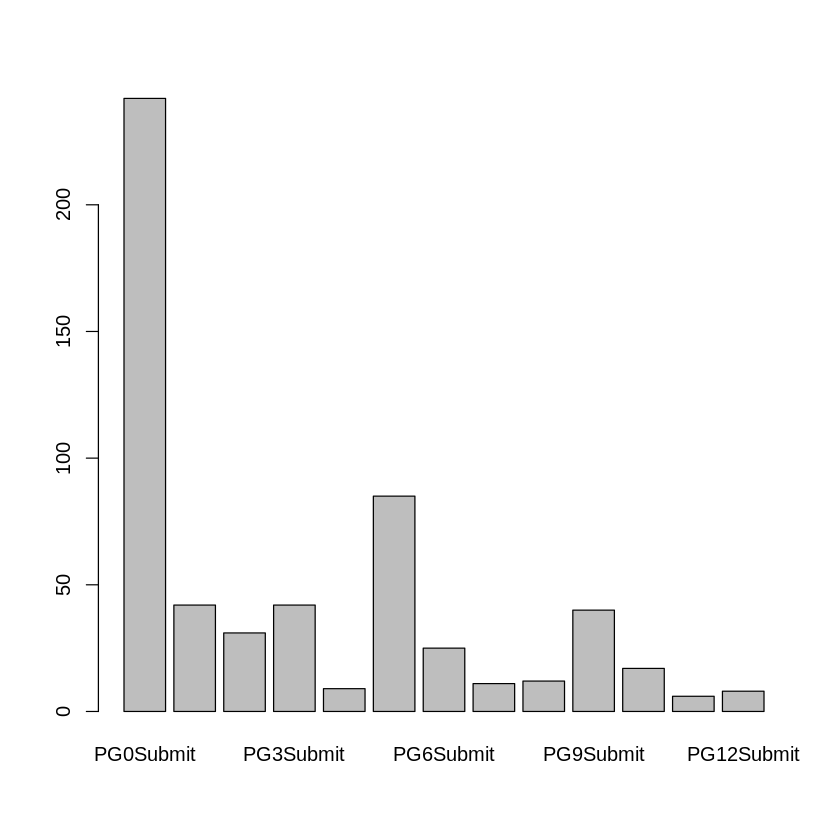

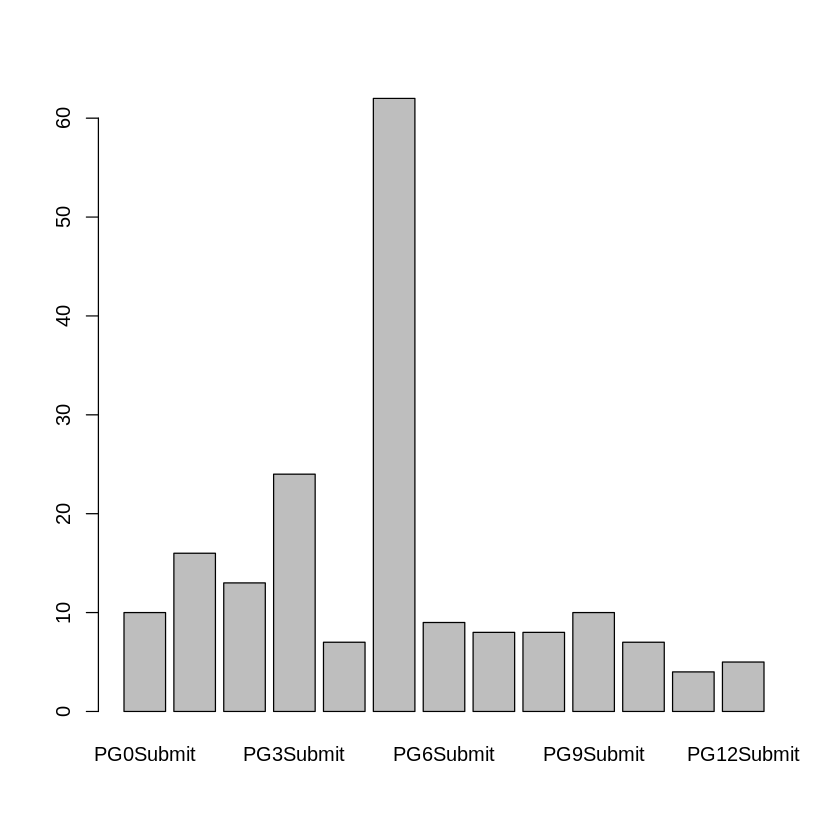

In [7]:
#Q2-Q3
submitted_time <- na.omit(select(completed_responses, contains('Submit')))
#summary(submitted_time)

mean_s_time <- round(apply(submitted_time, 2, mean))
print("Average time: ")
print(mean_s_time)
barplot(mean_s_time)

median_s_time <- apply(submitted_time, 2, median)
print("Median time: ")
print(median_s_time)
barplot(median_s_time)



By looking at the output, we can see that the highest average time to complete a question was for question 1 with 242 seconds. However, if we look at a barplot of the distribution, we see that there is lots of variation in the values for the average which can result in skewness. To get a more normal distribution, we would take the median, which will result in less variation in the values. After looking at the median output, we can see that the highest median time to complete a question is for question 5 with 62 seconds and the lowest time is question 11 with 4 seconds.

In [8]:
#Q4
criteria_rank = select(completed_responses, starts_with('PG5'), -ends_with('Time'), -ends_with('Order'), -ends_with('Submit')) 
summary(criteria_rank) 

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :335                  :381                  :225  
 Essential      : 59   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 25   High Priority  :199  
 Low Priority   : 85   Low Priority   :120   Low Priority   : 68  
 Medium Priority:130   Medium Priority: 91   Medium Priority:161  
 Not a Priority : 94   Not a Priority :185   Not a Priority : 49  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :311                  :213                  :310  
 Essential      : 22   Essential      : 79   Essential      : 61  
 High Priority  :109   High Priority  :247   High Priority  :136  
 Low Priority   : 87   Low Priority   : 63   Low Priority   : 83  
 Medium Priority:162   Medium Priority:160   Medium Priority:109  
 Not a Priority :114   Not a Priority : 43   Not a Priority :106  
           PG5_7NDYP              PG5_8CP               PG5_9F

The top-ranked criteria in the summary is PG5_8CP with 288 Essential and 195 high priority categories. Second on the list is PG5_9FRP with 165 Essential and 241 High Priority categories. 

    18 - 24     25 - 34     35 - 44     45 - 54     55 - 64 65 and over 
         34         338         258          89          36           8 


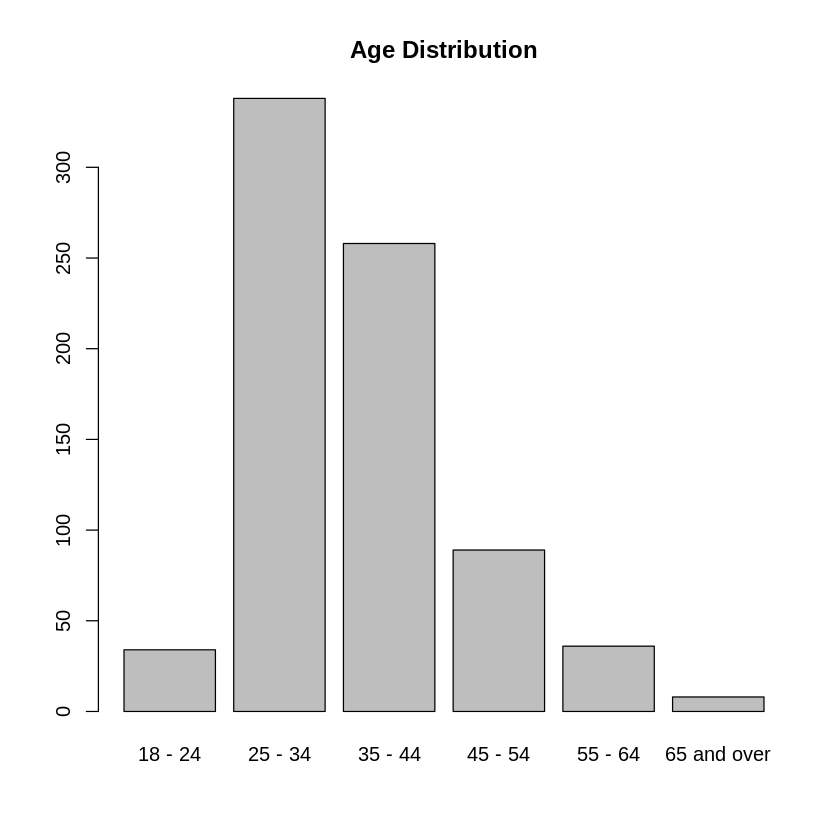

In [9]:
#Q5
age <- select(completed_responses, PG12Resp) %>%
    filter(PG12Resp != '')

age_dist <- factor(age[,])

#summary(completed_responses$PG5_1Order)
#barplot(prop.table(table(age$PG12Resp)))
print(summary(age_dist))
barplot(table(age_dist), main = 'Age Distribution')

## Hypothesis: 
I think the priority is going to be affected by the number of forks on Github. I believe this is the case because the importance of an issue is determined by how many people have forked it to their repository.


## Approach: Descriptive Statistics and what variables to use

We will first select variables and run a summary() to see some descriptive statistics. We will also see how normalized the distribution is. We will also exclude missing values.




In [86]:
# Selecting variables to model

vars = c('Device' ,'Start','End','PG0Dis','PG0Shown','PG0Submit','PG1PsnUse','PG1Trn',
'PG1Submit' ,'PG2Resp','PG2Submit','PG2Resp.1' ,'PG3Submit' ,
'PG4AllResp','PG4Submit',
#'PG5_13NFG',
'PG5_13Order',
'PG5_13Time','PG5Submit','PG6Resp','PG6Submit','PG7R','PG7C.C..','PG7Java','PG7Python','PG7Javascript',
'PG7Go','PG7C.','PG7Other','PG7Submit','PG8Resp','PG8Submit','PG9Resp','PG9Submit','PG10Resp','PG10Submit',
'PG11Resp','PG11Submit','PG12Resp','PG12Submit')

vars1 = c('Device' ,'Start','End','PG0Dis','PG0Shown','PG0Submit','PG1PsnUse','PG1Trn',
'PG1Submit' ,'PG2Resp','PG2Submit','PG2Resp.1' ,'PG3Submit' ,
'PG4AllResp','PG4Submit',
'PG5_13NFG',
#'PG5_13Order',
'PG5_13Time','PG5Submit','PG6Resp','PG6Submit','PG7R','PG7C.C..','PG7Java','PG7Python','PG7Javascript',
'PG7Go','PG7C.','PG7Other','PG7Submit','PG8Resp','PG8Submit','PG9Resp','PG9Submit','PG10Resp','PG10Submit',
'PG11Resp','PG11Submit','PG12Resp','PG12Submit')

d_frame = select(completed_responses, vars) %>%
    drop_na(PG5_13Order) %>%
    na.omit()
print(summary(d_frame))

d_frame2 = select(completed_responses, vars1) %>%
    drop_na(PG5_13NFG) %>%
    na.omit()
print(summary(d_frame2))

     Device        Start               End               PG0Dis   
        :  0   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  0   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :298   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  : 78   Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 45  
 Tablet :  5   3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  0   Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                                                                  
    PG0Shown      PG0Submit                                     PG1PsnUse  
 Min.   :   0   Min.   :    2   For personal work and/or research use:269  
 1st Qu.:   0   1st Qu.:    6                                        :107  
 Median : 110   Median :   10   Chapter book                         :  1  
 Mean   : 262   Mean   :   62   Learning how to create a package     :  1  
 3rd Qu.: 451   3rd Qu.:   16   Teaching                             :  1  
 Max.   

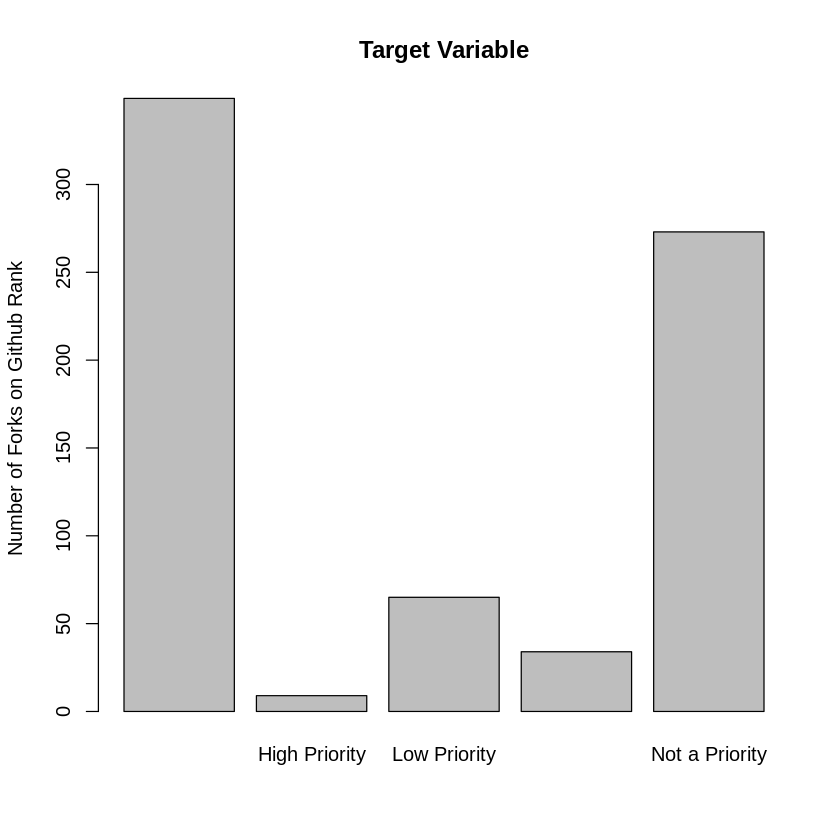

In [88]:
plot(d_frame2$PG5_13NFG, main = "Target Variable", ylab = "Number of Forks on Github Rank", xlab="")


In [89]:
# Removing level of target factor
d_frame2 <- filter(d_frame2, PG5_13NFG != '')
summary(d_frame2$PG5_13NFG)
d_frame2$PG5_13NFG <- factor(d_frame2$PG5_13NFG)
summary(d_frame2$PG5_13NFG)


High Priority    Low Priority Medium Priority  Not a Priority 
              0               9              65              34             273

High Priority    Low Priority Medium Priority  Not a Priority 
              9              65              34             273

## Correlation Analysis: 

Create a function that detects a correlation between variables that is higher than 0.7 and exclude them from the data-set

In [109]:
#Get correlations and mark those with high correlations
for(i in colnames(data))
{
    data[,i] <- as.numeric (data[,i]);
}
data <- replace(data, is.na(data), 0)

hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  return(sel)
}
hiCor(data,.7)

new_data <- data[,which(hiCor(data,.7) == TRUE)]


Device     Completed         Start           End        PG0Dis 
        FALSE          TRUE         FALSE          TRUE          TRUE 
     PG0Shown     PG0Submit     PG1PsnUse     PG1WdAuth        PG1Trn 
         TRUE         FALSE         FALSE         FALSE         FALSE 
     PG1Other     PG1Submit       PG2Resp     PG2Submit     PG2Resp.1 
        FALSE         FALSE         FALSE         FALSE          TRUE 
    PG3Submit     PG4Dtr0_6     PG4Psv7_8    PG4Prm9_10    PG4AllResp 
         TRUE         FALSE         FALSE          TRUE          TRUE 
    PG4Submit     PG5_1RRPQ    PG5_1Order     PG5_1Time     PG5_2BNUI 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   PG5_2Order     PG5_2Time      PG5_3HDS    PG5_3Order     PG5_3Time 
         TRUE          TRUE          TRUE          TRUE          TRUE 
     PG5_4VGP    PG5_4Order     PG5_4Time      PG5_5PHR    PG5_5Order 
         TRUE          TRUE          TRUE          TRUE          TRUE 
    PG5_5Time    PG5_6SSYOP    PG5_6Order     PG5_6Time     PG5_7NDYP 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   PG5_7Order     PG5_7Time       PG5_8CP    PG5_8Order     PG5_8Time 
         TRUE          TRUE          TRUE          TRUE          TRUE 
     PG5_9FRP    PG5_9Order     PG5_9Time     PG5_10RPA   PG5_10Order 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   PG5_10Time     PG5_11NSG   PG5_11Order    PG5_11Time     PG5_12NWG 
         TRUE          TRUE          TRUE          TRUE          TRUE 
  PG5_12Order    PG5_12Time     PG5_13NFG   PG5_13Order    PG5_13Time 
         TRUE          TRUE          TRUE          TRUE          TRUE 
    PG5Submit       PG6Resp     PG6Submit          PG7R      PG7C.C.. 
         TRUE          TRUE          TRUE          TRUE         FALSE 
      PG7Java     PG7Python PG7Javascript         PG7Go         PG7C. 
        FALSE         FALSE         FALSE         FALSE         FALSE 
     PG7Other     PG7Submit       PG8Resp     PG8Submit       PG9Resp 
        FALSE          TRUE          TRUE          TRUE          TRUE 
    PG9Submit      PG10Resp    PG10Submit      PG11Resp    PG11Submit 
         TRUE          TRUE          TRUE          TRUE          TRUE 
     PG12Resp    PG12Submit 
         TRUE          TRUE

## Model Fit
Now that the data is prepared, we can go into model fitting. Since we are just interpretting the coefficients of our model, we can just use linear regression. Code provided below.


In [114]:
MODEL <- lm(PG5_13NFG ~ ., data = new_data)
summary(MODEL)


Call:
lm(formula = PG5_13NFG ~ ., data = new_data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.570 -0.034 -0.006  0.067  3.250 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.01e-01   6.67e-01    0.30  0.76324    
Completed    4.08e-03   3.33e-01    0.01  0.99023    
End         -1.17e-10   2.28e-10   -0.51  0.60962    
PG0Dis       1.64e-04   2.60e-04    0.63  0.52749    
PG0Shown    -3.40e-05   5.64e-05   -0.60  0.54689    
PG2Resp.1    1.85e-04   3.33e-04    0.55  0.57942    
PG3Submit   -2.49e-07   9.45e-05    0.00  0.99790    
PG4Prm9_10   9.63e-03   4.72e-03    2.04  0.04168 *  
PG4AllResp  -1.19e-02   7.28e-03   -1.64  0.10106    
PG4Submit   -2.43e-04   9.74e-04   -0.25  0.80332    
PG5_1RRPQ    8.84e-02   1.84e-02    4.80  1.7e-06 ***
PG5_1Order   3.02e-03   6.12e-03    0.49  0.62192    
PG5_1Time   -9.34e-04   2.63e-04   -3.55  0.00039 ***
PG5_2BNUI    9.39e-02   2.21e-02    4.26  2.2e-05 ***
PG5_2Order   5.45e-03   5.78e-03    0.9

## Interpretation:
Looking at the summary output, we can  see that all of the predictors' coefficients are very small, with around half of the coefficients being negative and the other half being positive. Only 20 predictors show significance to the model (the p-value being less than 0.05). We can also see that see that the model's adjusted R-squared is 0.924, meaning that the model can explain 92.4% all the variability of the response data. This information gives evidence that supports our hypothesis. 

## Extra Credit: Survey Improvement:
One improvement on the survey would be to create a reasonable time limit in answering each question on the survey. This can remove the outliers of people who take a disproportionate time compared to the average time taken. It would also be nice to take out the sections of the survey that require filling in and replace them with responses that can be circled. This can prevent variability in the types of answers the survey receives and also prevents overlapping answers that are similar, which can help focus responses to be more specific. 


